In [8]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the edgelist
# edgelist = pd.read_csv("out.petster-hamster", sep=" ")
# edgelist.drop(['unweighted'], axis=1, inplace=True)
# edgelist.rename(columns={'%': 'source', 'sym': 'target'}, inplace=True)
edgelist = pd.read_csv("ca-AstroPh.mtx", sep=" ")
#edgelist.drop(['unweighted'], axis=1, inplace=True)
edgelist.rename(columns={'%': 'source', 'sym': 'target'}, inplace=True)
edgelist.head()

# Create the networkx graph
G = nx.from_pandas_edgelist(edgelist)

# Set parameters for the algorithm
pop_size = 30
max_iters = 200
mutation_prob = 0.05
num_seeds = 5
p = 0.05

# Define helper functions
def generate_individual():
    return list(np.random.choice(list(G.nodes()), size=num_seeds, replace=False))

def generate_population():
    return [generate_individual() for _ in range(pop_size)]

def fitness(individual):
    wcj = []
    for seed in individual:
        neighbors = list(G.neighbors(seed))
        degree = len(neighbors)
        Ivj = p * degree * (degree + len(set(sum([list(G.neighbors(n)) for n in neighbors], []))) * p)
        wcj.append(Ivj)

    return -1 * np.sum(wcj * np.log(wcj/np.sum(wcj))) / np.sum(wcj)

def select_parents(population):
    fitnesses = np.array([fitness(individual) for individual in population])
    fitness_probs = fitnesses / np.sum(fitnesses)
    parent_indices = np.random.choice(len(population), size=2, p=fitness_probs, replace=False)
    return parent_indices


def crossover(parent1, parent2):
    split_point = random.randint(1, num_seeds-1)
    child1 = parent1[:split_point] + parent2[split_point:]
    child2 = parent2[:split_point] + parent1[split_point:]
    return child1, child2

def mutate(individual):
    for i in range(num_seeds):
        if random.random() < mutation_prob:
            individual[i] = random.choice(list(G.nodes()))
    return individual

# Main algorithm loop
population = generate_population()
fitnesses = []
for i in range(max_iters):
    new_population = []
    for j in range(pop_size//2):
        parent_indices = select_parents(population)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]
        child1, child2 = crossover(parent1, parent2)
        new_population.append(mutate(child1))
        new_population.append(mutate(child2))

    population = new_population
    best_fitness = max([fitness(individual) for individual in population])
    print(f"Iteration {i+1}, Best Fitness: {best_fitness}")
    fitnesses.append(best_fitness)

# Plot the fitness graph


# Get the best individual
best_individual = max(population, key=fitness)
print(f"The best seed set is {best_individual}, with a fitness of {fitness(best_individual)}")


Iteration 1, Best Fitness: 1.4012371416506504
Iteration 2, Best Fitness: 1.4012371416506504
Iteration 3, Best Fitness: 1.441436277722368
Iteration 4, Best Fitness: 1.3775012921664413
Iteration 5, Best Fitness: 1.3750031167752297
Iteration 6, Best Fitness: 1.3955092758335441
Iteration 7, Best Fitness: 1.3955092758335441
Iteration 8, Best Fitness: 1.510587893769282
Iteration 9, Best Fitness: 1.46471051477379
Iteration 10, Best Fitness: 1.4805193294401129
Iteration 11, Best Fitness: 1.5003435940989027
Iteration 12, Best Fitness: 1.5035971979750717
Iteration 13, Best Fitness: 1.5068103580646877
Iteration 14, Best Fitness: 1.5563370616434764
Iteration 15, Best Fitness: 1.5035971979750717
Iteration 16, Best Fitness: 1.5232507122451504
Iteration 17, Best Fitness: 1.5568394689359533
Iteration 18, Best Fitness: 1.565180020248164
Iteration 19, Best Fitness: 1.5568394689359533
Iteration 20, Best Fitness: 1.5353996109284664
Iteration 21, Best Fitness: 1.5531660019074123
Iteration 22, Best Fitness:

Iteration 176, Best Fitness: 1.5992654389649883
Iteration 177, Best Fitness: 1.5992654389649883
Iteration 178, Best Fitness: 1.5992654389649883
Iteration 179, Best Fitness: 1.5992654389649883
Iteration 180, Best Fitness: 1.5889556190598753
Iteration 181, Best Fitness: 1.5571577014042004
Iteration 182, Best Fitness: 1.5522749345585065
Iteration 183, Best Fitness: 1.5762153045258047
Iteration 184, Best Fitness: 1.5571577014042004
Iteration 185, Best Fitness: 1.5315093435953044
Iteration 186, Best Fitness: 1.5354085872001122
Iteration 187, Best Fitness: 1.5315093435953044
Iteration 188, Best Fitness: 1.5889556190598753
Iteration 189, Best Fitness: 1.5889556190598753
Iteration 190, Best Fitness: 1.5579769196224136
Iteration 191, Best Fitness: 1.5882655980323344
Iteration 192, Best Fitness: 1.5743011335796224
Iteration 193, Best Fitness: 1.5882655980323344
Iteration 194, Best Fitness: 1.5585066750549839
Iteration 195, Best Fitness: 1.5874380938908614
Iteration 196, Best Fitness: 1.587438093

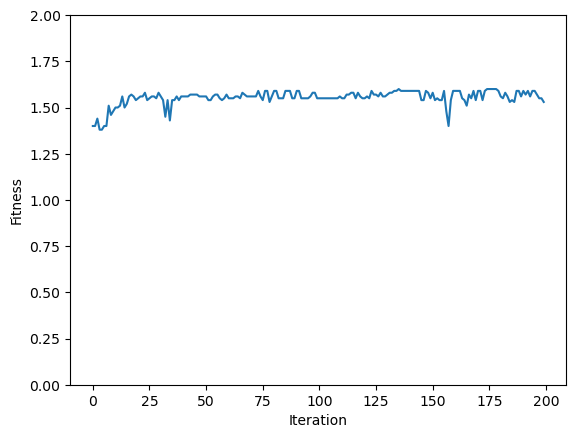

In [9]:
fitness1=[]
iteri =[]
for i in fitnesses:
    fitness1.append(round(i,2))
for i in range(max_iters):
    iteri.append(i)
plt.plot(iteri,fitness1)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.ylim(0,2)
plt.show()